In [2]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [9]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)

jtools installed
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zeallot’, ‘vctrs’, ‘cli’, ‘fansi’, ‘pillar’, ‘assertthat’, ‘glue’, ‘pkgconfig’, ‘R6’, ‘Rcpp’, ‘tibble’, ‘tidyselect’, ‘BH’, ‘TMB’, ‘lme4’, ‘mnormt’, ‘dplyr’, ‘emmeans’, ‘bayestestR’, ‘ggeffects’, ‘glmmTMB’, ‘insight’, ‘performance’, ‘psych’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


sjPlot installed
Warning message in pacman::p_load(wooldridge, stargazer, broom, tidyverse, ggplot2, :
“Failed to install/load:
jtools, sjPlot”

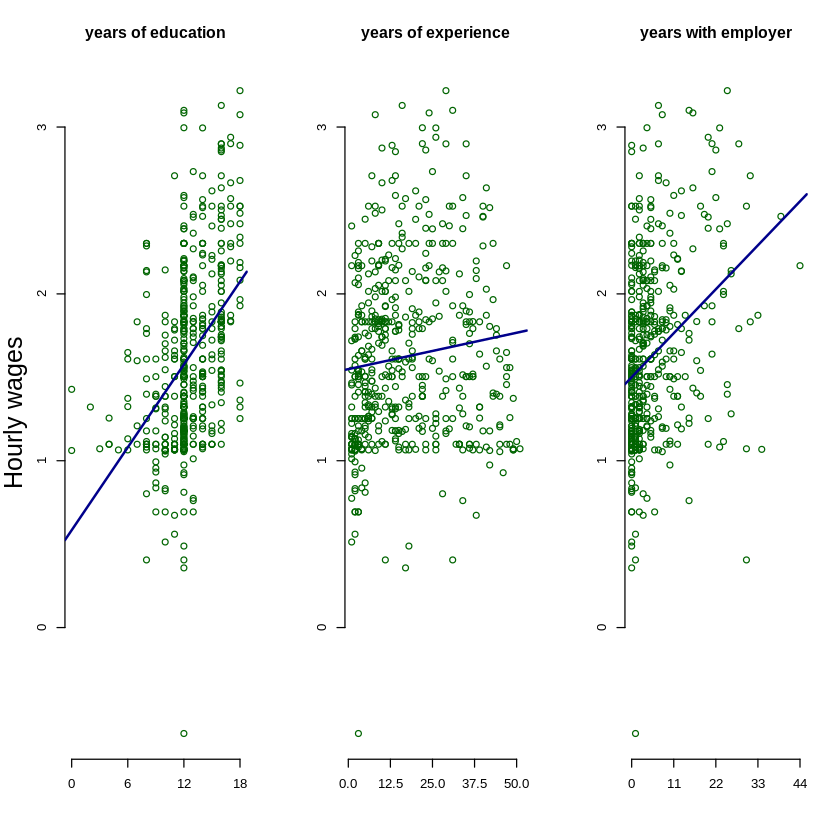

In [2]:
par(mfrow=c(1,3))

plot(y = wage1$lwage, x = wage1$educ, col="darkgreen", xaxt="n", frame = FALSE, main = "years of education", xlab = "", ylab = "")
mtext(side=2, line=2.5, "Hourly wages", cex=1.25)
axis(side = 1, at = c(0,6,12,18))
abline(lm(lwage ~ educ, data=wage1), col = "darkblue", lwd=2)

plot(y = wage1$lwage, x = wage1$exper, col="darkgreen", xaxt="n", frame = FALSE, main = "years of experience", xlab = "", ylab = "")
axis(side = 1, at = c(0,12.5,25,37.5,50))
abline(lm(lwage ~ exper, data=wage1), col = "darkblue", lwd=2)

plot(y = wage1$lwage, x = wage1$tenure, col="darkgreen", xaxt="n", frame = FALSE, main = "years with employer", xlab = "", ylab = "")
axis(side = 1, at = c(0,11,22,33,44))
abline(lm(lwage ~ tenure, data=wage1), col = "darkblue", lwd=2)

Estimate the model regressing educ, exper, and tenure against log(wage).

$$\widehat{log(wage)} = \beta_0 + \beta_1educ + \beta_3exper + \beta_4tenure$$

In [5]:
hourly_wage_model <- lm(lwage ~ educ + exper + tenure, data = wage1)

In [6]:
coefficients(hourly_wage_model)
kable(coefficients(hourly_wage_model), digits=4, col.names = "Coefficients", align = 'l')

(Intercept)        educ       exper      tenure 
0.284359541 0.092028988 0.004121109 0.022067218



|            |Coefficients |
|:-----------|:------------|
|(Intercept) |0.2844       |
|educ        |0.0920       |
|exper       |0.0041       |
|tenure      |0.0221       |

In [7]:
tidy(hourly_wage_model)

term,estimate,std.error,statistic,p.value
(Intercept),0.284359541,0.104190379,2.729230,6.562466e-03
educ,0.092028988,0.007329923,12.555246,8.824197e-32
exper,0.004121109,0.001723277,2.391437,1.713562e-02
tenure,0.022067218,0.003093649,7.133070,3.294407e-12


In [8]:
jtools::summ(hourly_wage_model)

ERROR: Error in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]): namespace ‘rlang’ 0.2.1 is already loaded, but >= 0.3.0 is required


In [ ]:
jtools::plot_summs(hourly_wage_model, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .9)

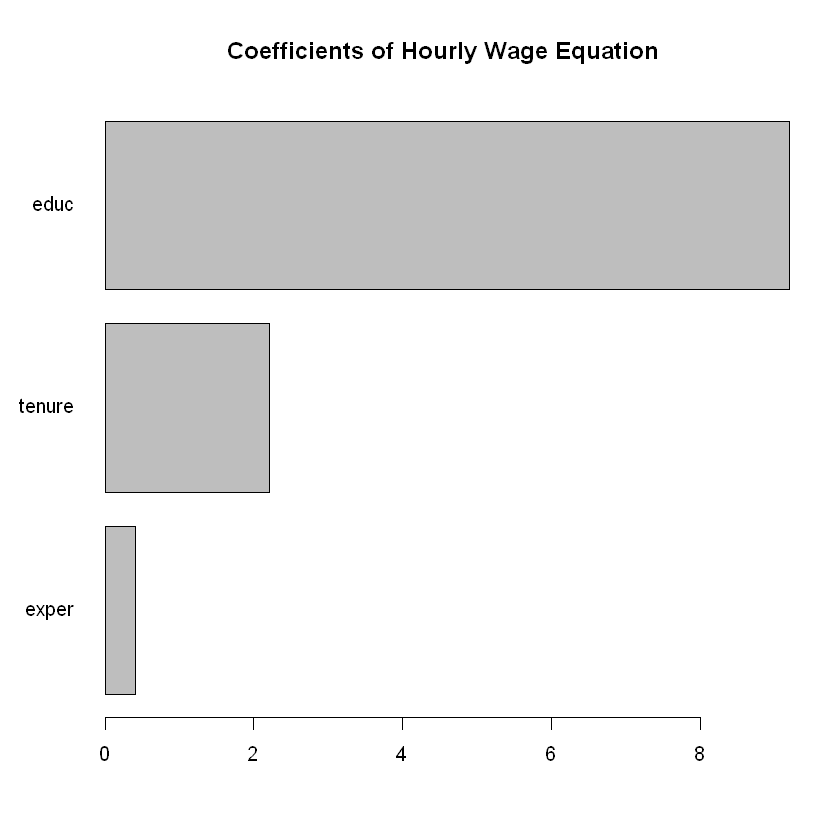

In [5]:
barplot(sort(100*hourly_wage_model$coefficients[-1]), horiz=TRUE, las=1,
        ylab = " ", main = "Coefficients of Hourly Wage Equation")

In [ ]:
https://www.r-econometrics.com/reproduction/wooldridge